In [1]:
import ROOT as r
import sys
import os

Welcome to JupyROOT 6.26/10


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r.gSystem.Load("../lib/libdataProducts.so")
r.gSystem.Load("../lib/libunpackers.so")

0

In [4]:
from nearline_helpers import *

In [5]:
ch1 = r.TChain("tree")
ch1.Add("../bin/*run00249_*.root")

37

In [6]:
ch2 = r.TChain("tree")
ch2.SetLineColor(2)
# ch2.Add("../bin/*run00250_*.root")
ch2.Add("../bin/*run00252_*.root")

22

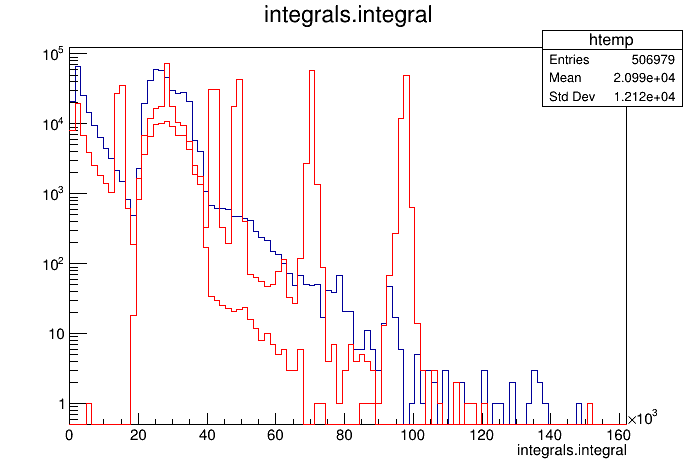

In [20]:
c = r.TCanvas()
ch1.Draw("integrals.integral","","")
ch2.Draw("integrals.integral","","same")
ch2.Draw("integrals.integral","@integrals.size() == 1","same")
c.SetLogy()
c.Draw()

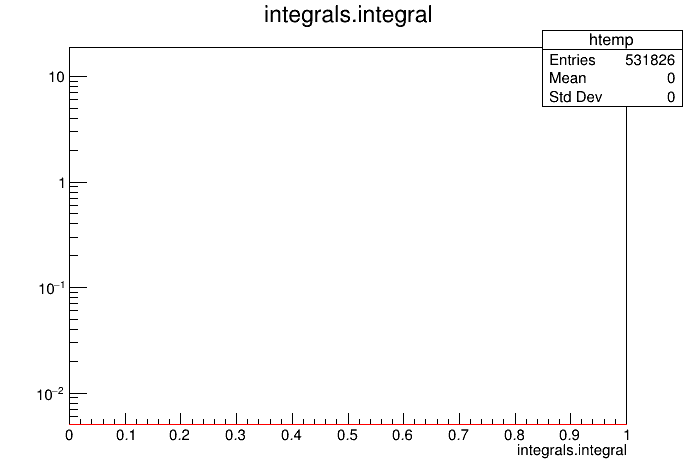

In [9]:
c = r.TCanvas()
ch2.Draw("integrals.integral","","same")
ch2.Draw("integrals.integral","@integrals.size() == 1","same")
c.SetLogy()
c.Draw()

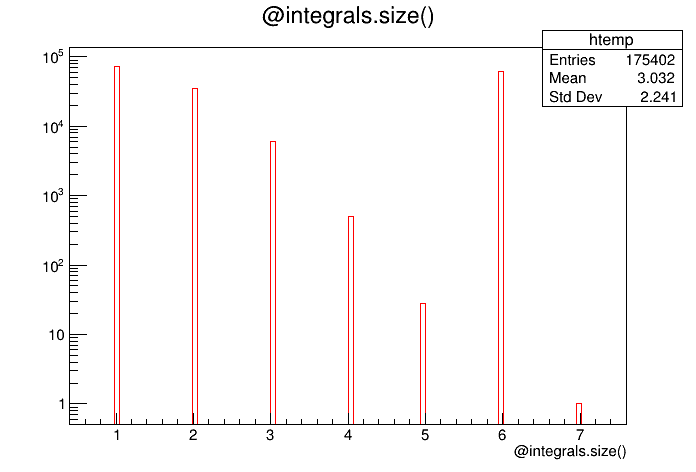

In [10]:
ch2.Draw("@integrals.size()")
c.Draw()

In [11]:
for i, e in enumerate(ch2):
    integrals = [x.integral for x in e.integrals]
    maxint = np.amax(integrals)
    if(maxint / np.sum(integrals) > 0.95):
        print('Event passes:', i, integrals)
        break

Event passes: 0 [23402.0]


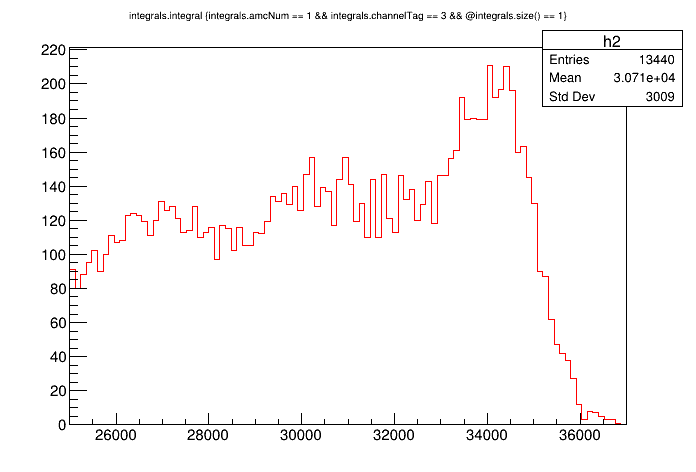

In [12]:
channel = 3
amc = 1

c = r.TCanvas()
# ch1.Draw("integrals.integral>>h( 100,20000,45000)", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","")
ch2.Draw("integrals.integral>>h2(100,25000,37000)", f"integrals.amcNum == {amc} && integrals.channelTag == {channel} && @integrals.size() == 1","")
# c.SetLogy()
# c.GetXaxis()
c.Draw()

In [13]:
import hist
import uproot

0 26861.58694001508 1844.5897603045546
1 26394.560441845453 3246.1797865351255
2 28498.831196393352 4112.122486224648
3 29680.396557539636 3863.543486467915
4 31600.53990653758 5058.24123214014


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


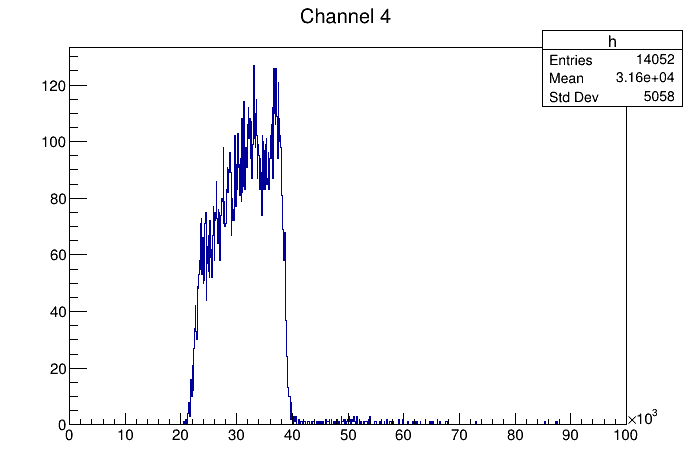

In [14]:
channel = 3
amc = 1

hists = {}
hists_orig = {}
for channel in range(5):
    c = r.TCanvas()
    # ch1.Draw("integrals.integral", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","")
    # ch2.Draw("integrals.integral", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","same")
    # c.SetLogy()
    # ch1.Draw("integrals.integral>>h( 100,20000,45000)", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","")
    h = r.TH1D("h",f"Channel {channel}",1000,0,100000)
    h2 = r.TH1D("h2",f"Channel {channel}",1000,0,100000)
    h.Reset()
    ch1.Draw("integrals.integral>>h2", f"integrals.amcNum == {amc} && integrals.channelTag == {channel} && @integrals.size() == 1","")
    ch2.Draw("integrals.integral>>h", f"integrals.amcNum == {amc} && integrals.channelTag == {channel} && @integrals.size() == 1","")
    print(channel,h.GetMean(), h.GetStdDev())
    hists[channel] = uproot.from_pyroot(h).to_hist()
    hists_orig[channel] = uproot.from_pyroot(h2).to_hist()
    # c.Print(f"./channel{channel}.png")
    c.Draw()

In [15]:
hists[channel]

Hist(Regular(1000, 0, 100000, name=<TString 'xaxis' at 0x7ff11e1c4150>), storage=Double()) # Sum: 14052.0

In [21]:
with uproot.recreate('17mev_250.root') as fout:
    for channel in hists:
        fout[f'h_{channel}'] = hists[channel]
        fout[f'h2_{channel}'] = hists_orig[channel]

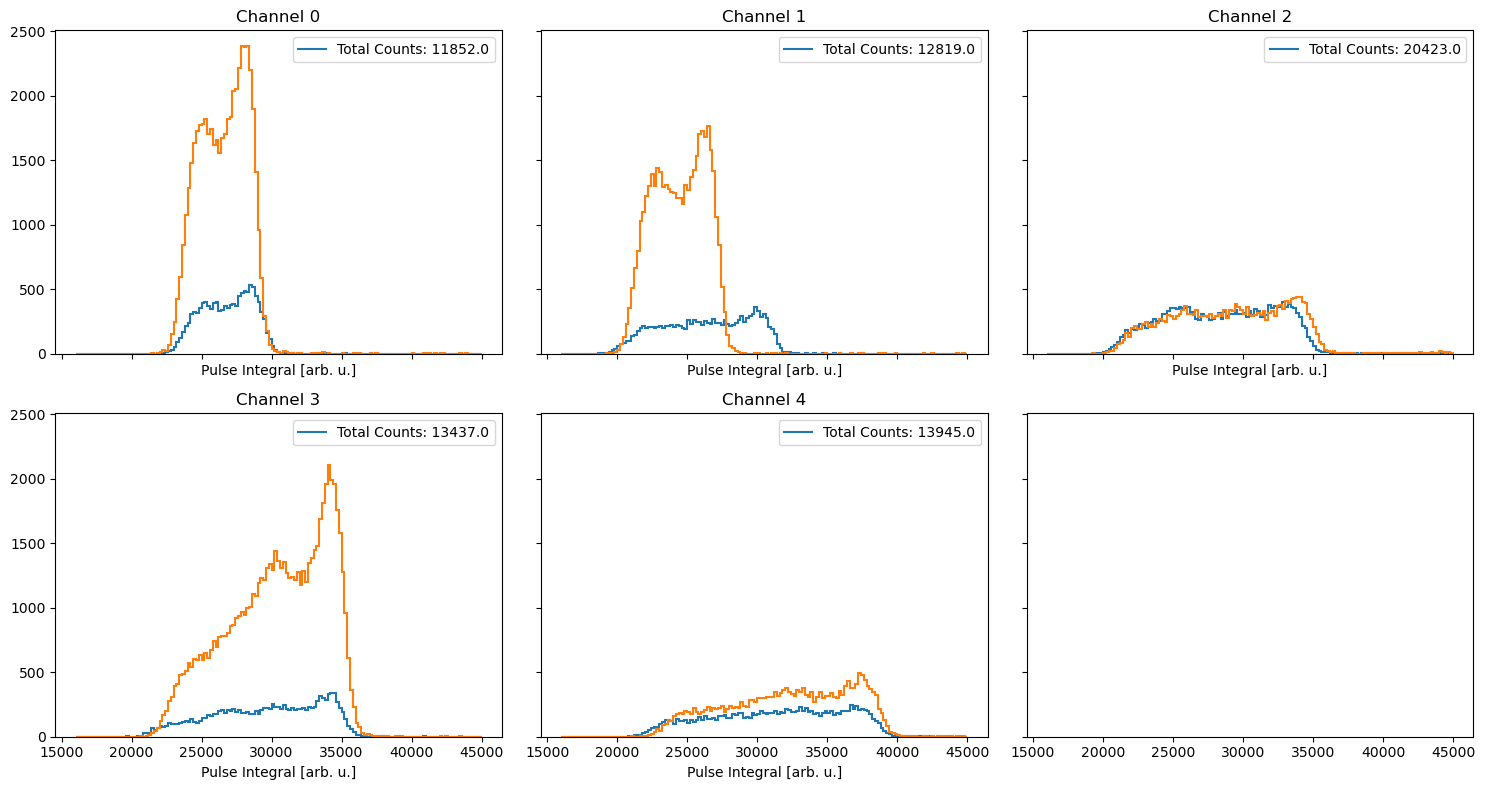

In [18]:
fig,ax = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for channel in hists:    
    axi = ax.ravel()[channel]
    h = hists[channel]
    h2 = hists_orig[channel]
    # label=f'Run'
    axi.set_title(f'Channel {channel}')
    hi = h[16000j:45000j:hist.rebin(2)]
    hi2 = h2[16000j:45000j:hist.rebin(2)]
    counts = np.sum(hi.values())
    hi.plot(
        ax=axi, yerr=False,
        label=f'Total Counts: {counts}'
    )
    hi2.plot(
        ax=axi, yerr=False,
        # label=f'Total Counts: {counts}'
    )
    axi.legend()
    axi.set_xlabel("Pulse Integral [arb. u.]")
plt.tight_layout()
# plt.yscale("log")
plt.show()

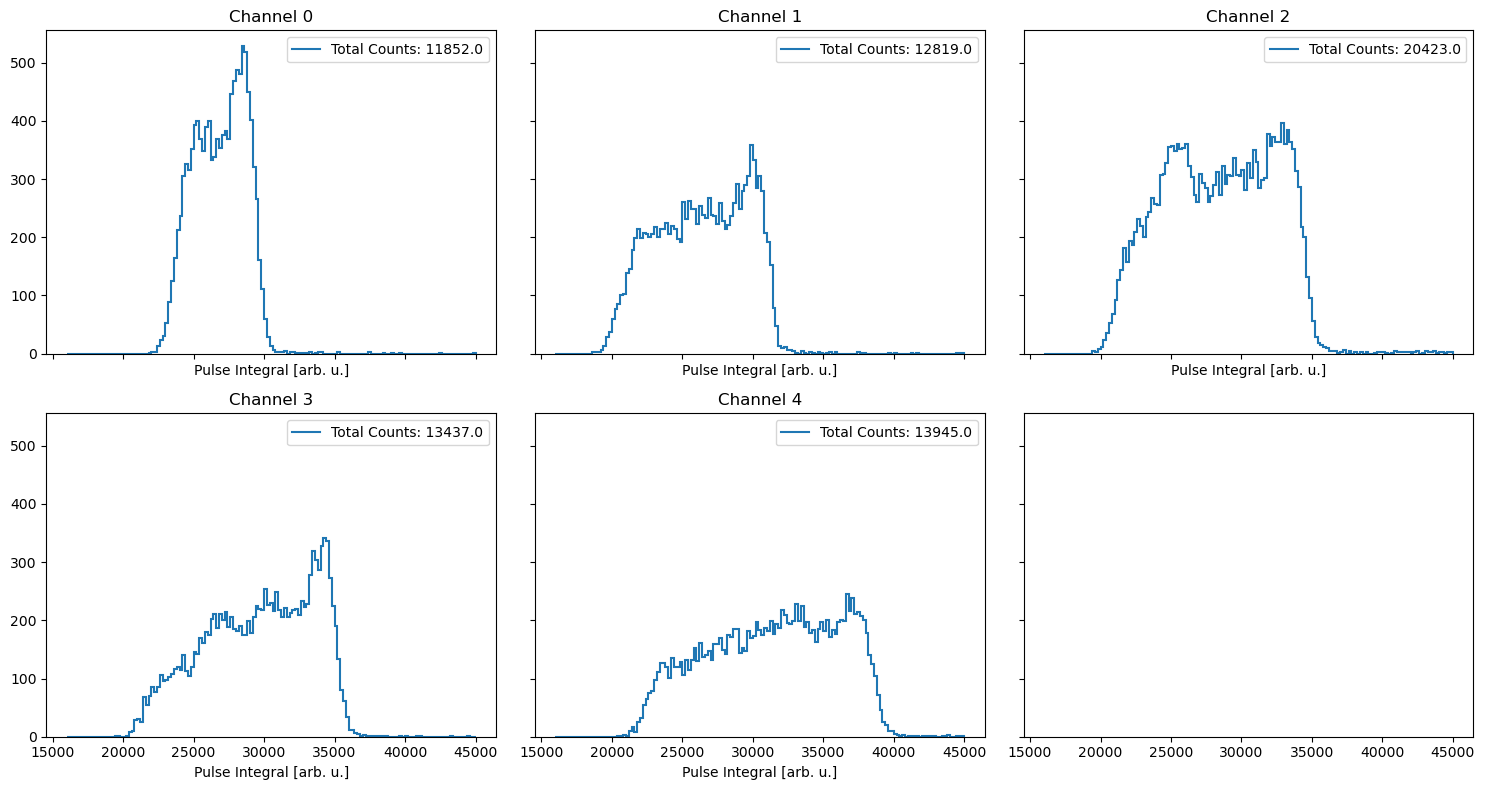

In [17]:
fig,ax = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for channel in hists:    
    axi = ax.ravel()[channel]
    h = hists[channel]
    h2 = hists_orig[channel]
    # label=f'Run'
    axi.set_title(f'Channel {channel}')
    hi = h[16000j:45000j:hist.rebin(2)]
    hi2 = h2[16000j:45000j:hist.rebin(2)]
    counts = np.sum(hi.values())
    hi.plot(
        ax=axi, yerr=False,
        label=f'Total Counts: {counts}'
    )
    # hi2.plot(
    #     ax=axi, yerr=False,
    #     # label=f'Total Counts: {counts}'
    # )
    axi.legend()
    axi.set_xlabel("Pulse Integral [arb. u.]")
plt.tight_layout()
# plt.yscale("log")
plt.show()

In [ ]:
counter = 0
for i, e in enumerate(ch2):
    for j, wf in enumerate(e.integrals):
        if wf.integral > 26000 and wf.integral < 27000:
            plot_integral(wf)
            plt.show()
            counter += 1
    if(counter > 10):
        break

In [ ]:
ch2.Draw("integrals.channelTag", "amcNum == 1")
c.SetLogy(0)
c.Draw()

In [ ]:
ch2.Draw("integrals.channelTag:integrals.integral", "integrals.amcNum == 1 && integrals.channelTag == 0", "colz")
c.Draw()

In [ ]:
ch2.Draw("integrals.channelTag:integrals.integral", "amcNum == 1", "colz")
c.SetLogy(0)
c.Draw()

In [ ]:
channel_map = {
    0:'C',
    1:'B',
    2:'G',
    3:'F',
    4:'E',
}


layout_string = '.AABBCC.\nDDEEFFGG\n.HHIIJJ.'

def plot_integral(w,ax=None, subtract_pedestal=False):
    if(ax is None):
        fig,ax = plt.subplots()
    else:
        fig = plt.gcf()
    plt.sca(ax)
        
    wf = w.raw.GetObject()
    trace = np.array(wf.trace,dtype=float)
    samples = range(len(trace))
    
    if(subtract_pedestal):
        trace -= wf.pedestalLevel
        ped = np.full_like(0., wf.pedestalLevel)
    else:
        ped = np.full_like(samples, wf.pedestalLevel)

    plt.plot(samples,trace,color='C0', label=f'Full Integral: {w.fullintegral:.2f}')
    cut = np.full_like(trace, False)
    cut[w.integration_window.first:w.integration_window.second] = True
    plt.plot(samples,np.where(cut, trace, np.nan), color='C1', label=f'Restricted Integral: {w.integral:.2f}')
    plt.plot(samples,ped, color='C2')
    plt.fill_between(samples, ped-wf.pedestalStdev, ped+wf.pedestalStdev, alpha=0.2, color='C2')
    title = f'AMC Number: {wf.amcNum}\nChannel: {wf.channelTag}\nEvent: {wf.eventNum}'
    plt.legend(title=title)
    # plt.show()
    return fig,ax

def plot_event_array(e,layout = layout_string):
    fig,ax = plt.subplot_mosaic(layout)
    for j, wfj in enumerate(e.integrals):
        channel = wfj.channelTag
        axi = ax[channel_map[channel]]
        plot_integral(wfj, axi, subtract_pedestal=True)
        axi.get_legend().remove()

    plt.tight_layout()
    plt.show()


In [ ]:
done = False
for i, e in enumerate(ch1):
    for j, wfj in enumerate(e.integrals):
        if wfj.integral > 30000:
            plot_integral(wfj)
            plt.show()
            plot_event_array(e)
            plt.tight_layout()
            plt.show()
            done = True
        if(done):
            break
    if(done):
        break